In [201]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing/target.csv
/kaggle/input/housing/train.csv
/kaggle/input/housing/test.csv
/kaggle/input/housing/AmesHousing.csv


In [202]:
df = pd.read_csv("/kaggle/input/housing/AmesHousing.csv")

In [203]:
df.shape

(2930, 82)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [205]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [206]:
df.corr()['SalePrice'].sort_values()

/tmp/ipykernel_32/4269891110.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values()


PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Order             -0.031408
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0

## Data Featuring

We need to deal with the missing data and outliers before start to applying machine learning models.

## Outliers

Using the columns with the highest correlation we ca plot scatter plots to spot some outliers.

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

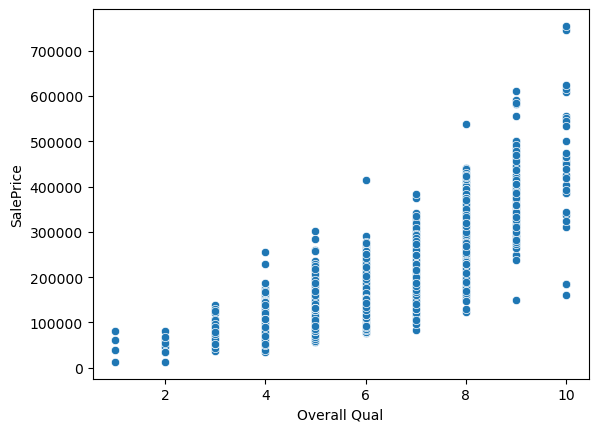

In [207]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

We can see that some low prices even with a high overall quality.

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

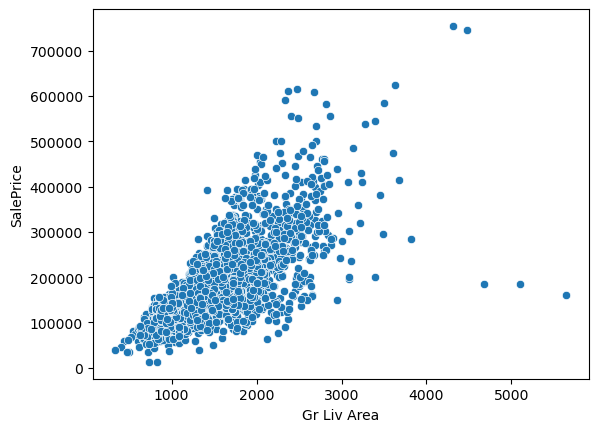

In [208]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

There are 3 point with big Gr Liv Area and low price.

In [209]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [210]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [211]:
df = df.drop(index=[1498,2180,2181],axis=0)

In [212]:
df.shape

(2927, 82)

## MISSING DATA

In [213]:
df = df.drop("PID",axis=1)

In [214]:
def percent_missing(df):
    # calculates percentage
    percent_nan = 100 * df.isnull().sum() / len(df) 
    # filter greater than 0 and sort data
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [215]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

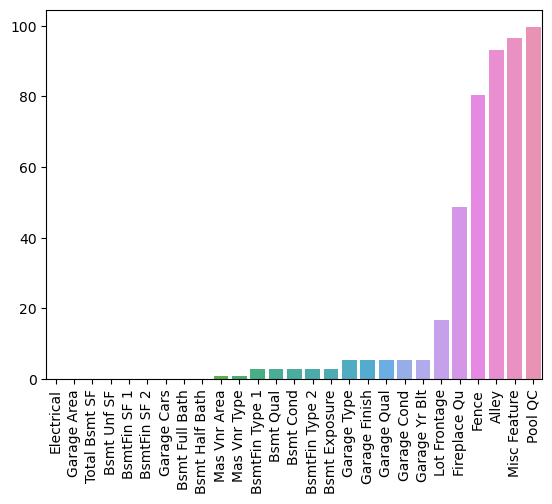

In [216]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

First we will deal with the ones missing less data

In [217]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [218]:
df[df['Electrical'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,1578,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [219]:
df[df['Garage Area'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,2237,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [220]:
df = df.dropna(axis=0,subset=['Electrical','Garage Area'])

In [221]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

In [222]:
df[df['Bsmt Unf SF'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [223]:
df[df['Total Bsmt SF'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [224]:
df[df['BsmtFin SF 2'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [225]:
df[df['BsmtFin SF 1'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [226]:
df[df['Bsmt Full Bath'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [227]:
df[df['Bsmt Half Bath'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [228]:
df.iloc[[1341,1497]]['Bsmt Qual']

1341    NaN
1497    NaN
Name: Bsmt Qual, dtype: object

All the Bsmt columns are related to basements, seeing the behavior of the null rows, we can assume these don't have a basement, so we can replace those values with 0 to numerical columns and None to categorial ones

In [229]:
# Numerical Basement Data
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)


In [230]:
# String Basement Data
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

(0.0, 1.0)

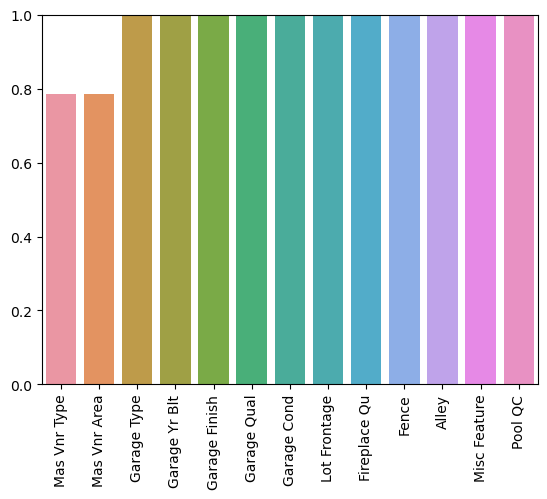

In [231]:
percent_nan = percent_missing(df)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90); 
plt.ylim(0,1)

Let's now investigate the last 2 with less than 1%.

In [232]:
df['Mas Vnr Type'].unique()

array(['Stone', 'None', 'BrkFace', nan, 'BrkCmn', 'CBlock'], dtype=object)

Unique value of None in the result indicates that the missing values of Mas Vnr Type may be just the type None.
So we replace the missing Mas Vnr Type by None and also replace Mas Vnr Area by 0.

In [233]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

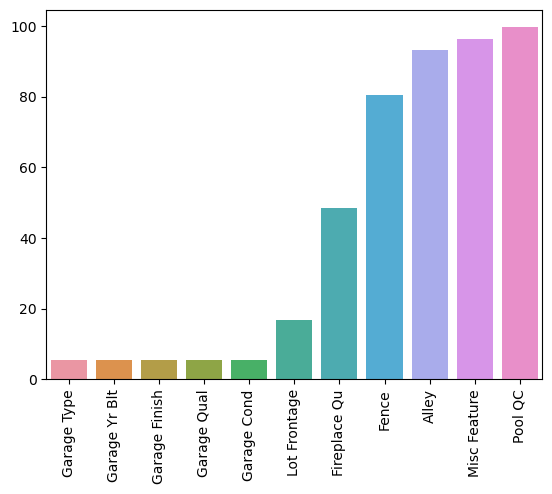

In [234]:
percent_nan = percent_missing(df)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Now all our missing data is more than 1%.

From the above chart its quite visible that a no. of garage features are missing. It may be the case that actually there are no garages in the house. Hence, let us give the same treatment that we gave to our basement.

In [235]:
df['Garage Type'].unique()

array(['Attchd', 'BuiltIn', 'Basment', 'Detchd', nan, 'CarPort', '2Types'],
      dtype=object)

In [236]:
# Garage String Columns
gar_str_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [237]:
# Garage Numeric Columns
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

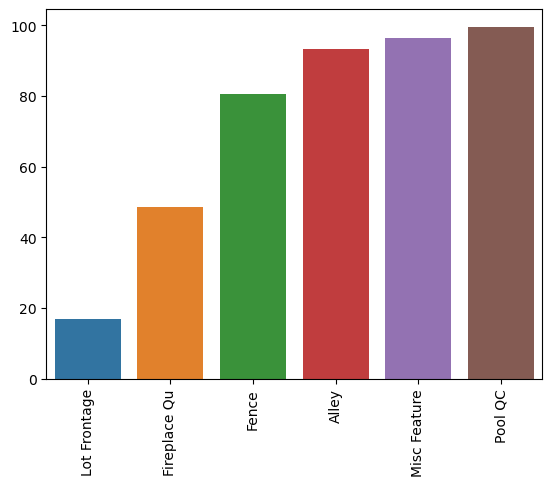

In [238]:
percent_nan = percent_missing(df)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90); 

In [239]:
df = df.drop(['Fence','Alley','Misc Feature','Pool QC'],axis=1)

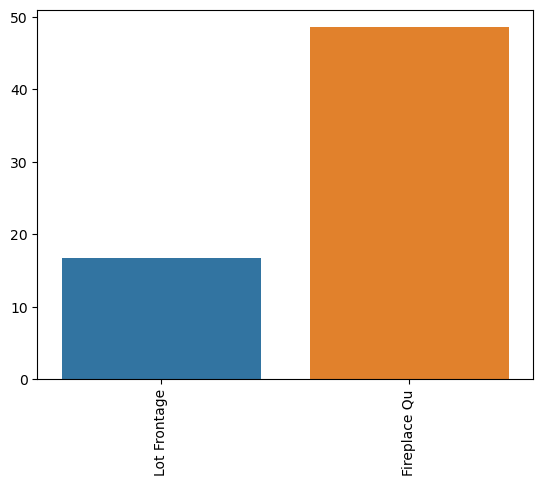

In [240]:
percent_nan = percent_missing(df)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90); 

In [241]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [242]:
df['Lot Frontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     116
75.0     105
        ... 
119.0      1
137.0      1
25.0       1
152.0      1
133.0      1
Name: Lot Frontage, Length: 128, dtype: int64

In [243]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

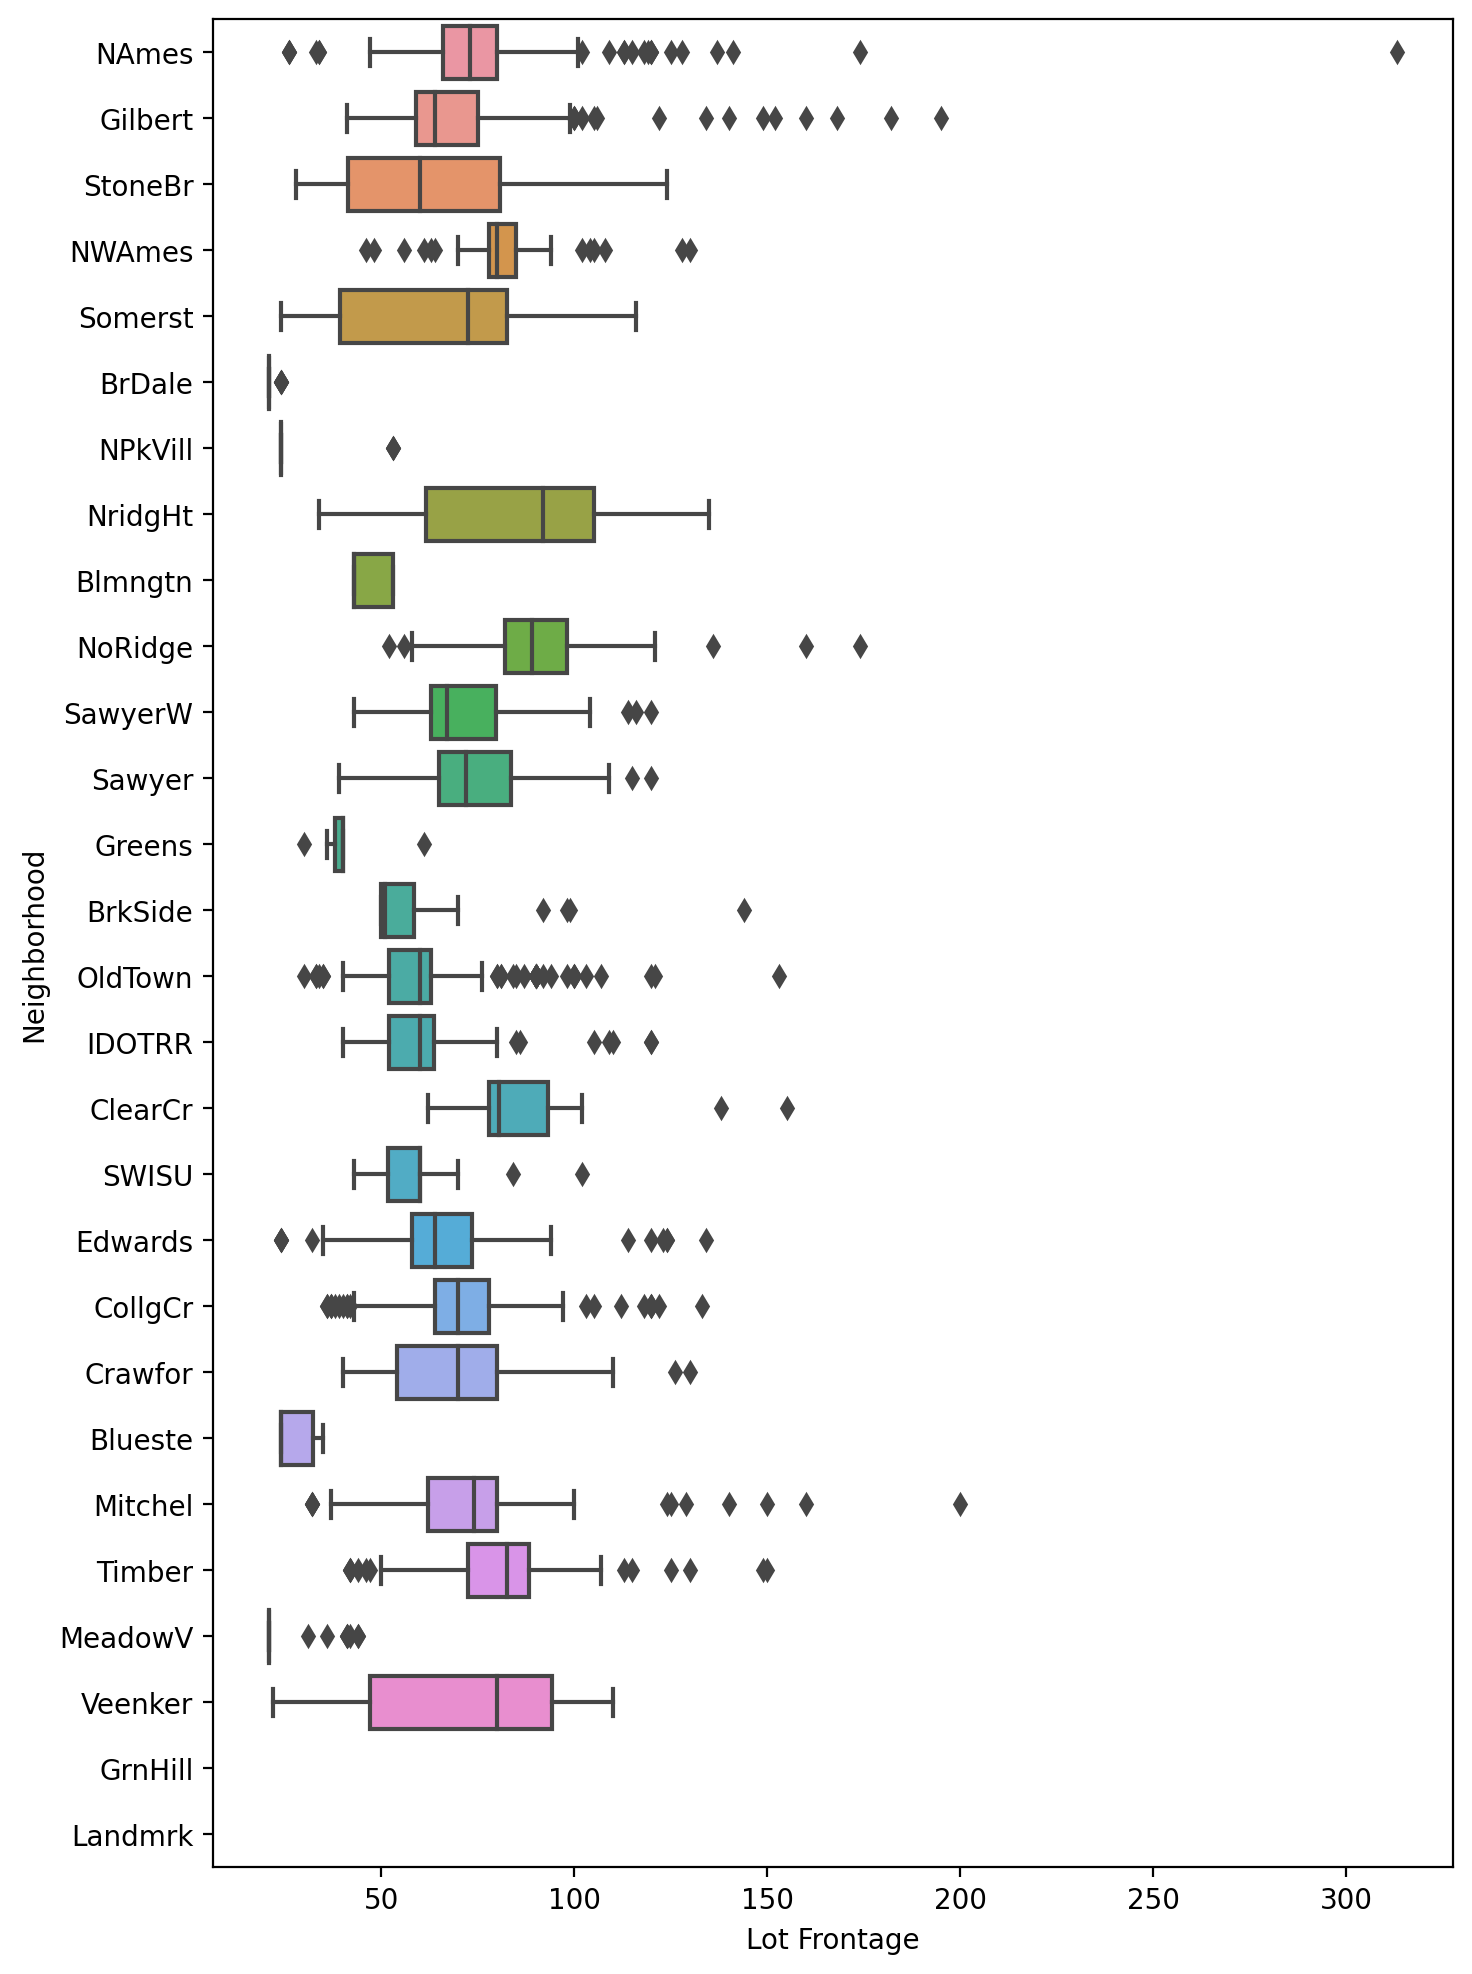

In [244]:
plt.figure(figsize=(8,12),dpi=200) # To make the plot a bit taller for better visualisation
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [245]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [246]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [247]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    0.102564
dtype: float64

In [248]:
df.isnull().sum()

Order             0
MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 77, dtype: int64

In [249]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [250]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

## Transforming data

In [251]:
# Convert to string
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [252]:
# Return all columns with String 
object_df = df.select_dtypes(include='object')

In [253]:
# Return all columns with Numerical Values
numeric_df = df.select_dtypes(exclude='object')

In [254]:
# Replace with dummy variables
df_objects_dummies = pd.get_dummies(object_df,drop_first=True)

In [255]:
# Concatenate the object with string to complete the dataframe
final_df = pd.concat([numeric_df,df_objects_dummies], axis=1)

In [256]:
# Drop order column. Its just the index
final_df = final_df.drop('Order',axis=1)

In [257]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


## Machine Learning

In [258]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(25), uint8(238)
memory usage: 1.5 MB


In [259]:
X = final_df.drop('SalePrice',axis=1)
y = final_df.SalePrice

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [261]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_Scaled = scaler.fit(X_train)
X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [262]:
from sklearn.linear_model import ElasticNet

Elastic_model = ElasticNet(max_iter=10000)

In [263]:
param_grid={'alpha':[5,10,50,100,150,200],'l1_ratio':[.95, .99, 1]}

In [264]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(estimator=Elastic_model,param_grid = param_grid,scoring='neg_mean_squared_error',cv=5,
verbose=1)

In [265]:
grid_model.fit(X_train_Scaled,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [5, 10, 50, 100, 150, 200],
                         'l1_ratio': [0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [266]:
grid_model.best_params_

{'alpha': 150, 'l1_ratio': 1}

In [267]:
y_pred = grid_model.predict(X_test_Scaled)

In [271]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred)

14195.033797515905

In [272]:
np.sqrt(mean_squared_error(y_test,y_pred))

20571.997366320207

In [273]:
np.mean(df['SalePrice'])

180815.53743589742

## Conclusion

Using elasticnet model we managed to predict the price values with a MAE of ~ $14195.038.